# Problem z pakowaniem pojemników  z pomocą AG
(Bin packing problem)

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-instance.png">
</p>

W przypadku problemu pakowania w pojemniki przedmioty o różnej objętości muszą być pakowane w liczbę pojemników, z których każdy ma określoną objętość w sposób minimalizujący liczbę używanych pojemników. 

W teorii złożoności obliczeniowej jest to kombinatoryczny problem <b>NP</b> - trudny.

<p align="center">
  <img width="660" height="300" src="https://scipbook.readthedocs.io/en/latest/_images/bpp-solution.png">
</p>

Spróbujmy rozwiązać ten problem za pomocą <b>Algorytmu Genetycznego</b>.

Jednak przed przystąpieniem do projektu postanowiłem uzupełnić braki wiedzy i kupiłem książkę: ["Genetic Algorithms with Python" by Clinton Sheppard](https://leanpub.com/genetic_algorithms_with_python)

(Jeśli ktoś jest zainteresowany, mogę wysłać książkę jako osobistą wiadomość w formacie .pdf)

# Sekwencja działań algorytmu

Najczęściej działanie algorytmu przebiega następująco:

* Losowana jest pewna populacja <i>początkowa</i>
* Selekcja
* Krzyżowanie
* Mutacja
* Rodzi się drugie (kolejne) pokolenie
* Jeśli znajdziemy wystarczająco dobre rozwiązanie, wybieramy najlepszego osobnika z populacji - jego genotyp to uzyskany <b>wynik</b>.

In [1]:
from collections import Counter # rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów

import numpy as np
import matplotlib.pyplot as plot

# Populacja

W dowolnym momencie algorytm genetyczny przechowuje populację osobników - zbiór potencjalnych rozwiązań danego problemu.

In [2]:
n = 100 # liczba przedmiotów, które chcemy zmieścić w kontenerach

In [3]:
v = np.random.random(size = n) # objetości tych przedmiotów
np.round(v, 3)

array([0.636, 0.307, 0.052, 0.58 , 0.661, 0.78 , 0.229, 0.322, 0.175,
       0.792, 0.37 , 0.289, 0.124, 0.839, 0.331, 0.57 , 0.995, 0.312,
       0.741, 0.378, 0.911, 0.451, 0.176, 0.447, 0.568, 0.847, 0.845,
       0.09 , 0.322, 0.607, 0.196, 0.42 , 0.627, 0.518, 0.166, 0.74 ,
       0.758, 0.779, 0.104, 0.271, 0.149, 0.02 , 0.524, 0.963, 0.589,
       0.036, 0.362, 0.74 , 0.056, 0.853, 0.431, 0.708, 0.119, 0.945,
       0.047, 0.856, 0.582, 0.555, 0.213, 0.722, 0.238, 0.366, 0.289,
       0.084, 0.458, 0.614, 0.627, 0.564, 0.673, 0.976, 0.732, 0.691,
       0.888, 0.337, 0.649, 0.892, 0.63 , 0.673, 0.064, 0.394, 0.508,
       0.47 , 0.187, 0.13 , 0.942, 0.594, 0.983, 0.401, 0.221, 0.595,
       0.395, 0.225, 0.306, 0.791, 0.419, 0.443, 0.922, 0.631, 0.398,
       0.712])

In [4]:
v_max = 3 # maksymalna objetość każdego kontenera

Stąd mamy obiekty o pewnej objętości $v_i$, $i=1,...,n$ i dowolną liczbę kontenerów, każdy o pojemności <i>v_max</i>.

<i>Jaka jest najmniejsza liczba kontenerów potrzebna, by spakować wszystkie obiekty?</i>

# Rozwiązania w populacji

Reprezentacja załadowania $nr$_$kontenera()$ :
* $[i_1,i_2,\dots,i_n]$,  gdzie $i_k$ oznacza № kontenera, w którym jest obiekt $k$.

In [5]:
def nr_kontenera(): # konfiguracja numerów kontenera
    return np.random.randint(n, size=n) # wybrany losowo

print(nr_kontenera())

[ 9 71  3 54  5 17 28 53 70 48 61 27 48 71 20 42 91 38 66 21 47 77 61 25
 34  3 49 29 10 81 38 46 12 66 76 44 23 88 72 61  5 13 12 35 78 79 27 27
 12 39 81 23  0 78 28 71 44 98 77 25 73 50 39 76 16 15 62 13 91 68  8 23
 41  0 38 83  3 44 63 30 32 53 29 94 81 27 29 98  1 99 27 59 67  4  9 61
  3 27 93 23]


#  Populacja początkowa 1000 osobników 

In [6]:
population_size = 1000

# każda osoba z populacji wybiera własną konfigurację numerów kontenerów 
population = np.array([nr_kontenera() for _ in range(population_size)])
population 

array([[88, 97, 93, ..., 39, 34, 47],
       [31, 54,  8, ..., 95, 54,  3],
       [76, 78, 10, ..., 69, 91, 64],
       ...,
       [44,  9,  6, ..., 28, 13, 48],
       [37, 91, 22, ..., 39, 19, 47],
       [80, 96, 29, ..., 86, 53, 27]])

In [7]:
population[0]

array([88, 97, 93,  6, 15, 50, 71, 48, 20, 29, 27, 87, 77, 55, 60, 29, 14,
        7, 41, 97, 77, 86, 19, 27, 60, 79, 92, 48, 17,  9, 23, 68, 98, 20,
       37, 11,  1, 83, 50,  5,  8, 37, 10, 17, 83, 76, 65, 94,  6, 74, 77,
       18, 62, 42, 29, 40, 39, 24,  4, 57,  5,  4, 84, 78, 44,  6, 18, 77,
       58, 14, 92, 69, 30, 75, 91,  6, 34, 92,  7, 94,  5, 98, 75, 30, 32,
       69, 34, 77, 44, 74, 73, 27, 97, 37, 78, 32, 45, 39, 34, 47])

Liczymy liczbę użytych kontenerów za pomozą funkcji <b>quantity()</b>

In [9]:
def quantity(nr_kontenera):                
    myDict = Counter(nr_kontenera) # Counter - rodzaj słownika, który pozwala policzyć liczbę niezmiennych obiektów
    return len(myDict) # liczba unikalnych elementów == liczba użytych kontenerów !!!

quantity(population[0]) # Pierwsza osoba z populacji wybrała X kontenery

59

Funkcja <b>sumy</b> po numerach kontenerów, np. [1,2,0,4,5] -> 1+2+0+4+5 

In [10]:
def suma(nr_kontenera):    
    return sum(nr_kontenera)

suma(population[0])

4808

Obliczamy zużytą objętość każdego pojemnika, która została wybrana przez każdą osobę z populacji za pomozą funkcji <b>volume()</b>

In [11]:
def volume(nr_kontenera):  
    ress_final = []    
    ress = []
    for j in range(n):
        nr_kont = nr_kontenera[j]
        summ = 0        
        for u in range(n):
            if nr_kont == nr_kontenera[u]: # jeśli przedmioty należą do jednego pojemnika, sumuje się ich objętość !!!
                summ += v[u]             
        ress.append(summ)
    new_ress = list(set(ress))
    ress_final.append(new_ress)
    return ress_final

Wykorzystana objętość pojemników przez pierwszą osobę:

In [12]:
alll = volume(population[0])
NEW_alll = alll[0]
NEW_alll # liczba elementów NEW_alll == liczba użytych kontenerów !!!

[0.6360131556258121,
 0.9896664012191225,
 0.05226640859366527,
 2.140707676718975,
 0.6608263914470375,
 0.8837017137553551,
 0.22877717336002945,
 0.4117084564121979,
 0.6931751757649496,
 1.4089398245210516,
 1.0423190222820482,
 2.4305947472629597,
 2.250156050697889,
 1.385025168578835,
 0.2886292918206588,
 1.1343599606630408,
 1.2124257839862536,
 0.9778628806492818,
 0.7402541711804393,
 0.5244657650838018,
 1.4481501240981243,
 1.3352823871381436,
 0.5036000536451196,
 0.5240113041141173,
 0.7410035601597318,
 0.0363366015651827,
 0.39489576391891634,
 0.6069671105259652,
 0.8555162208983597,
 0.5551791572291273,
 0.1760050051482276,
 0.5788155840412257,
 0.6791315726719898,
 0.9216302567920307,
 0.7122886350045379,
 1.2847781294232972,
 1.0973570267903883,
 1.0175507998919224,
 0.9450618287418734,
 0.648780771012306,
 0.899738996799923,
 0.4196968064975988,
 1.3683326125221627,
 0.14916086306663645,
 0.36214568168576855,
 0.673118892113885,
 0.8389484422643849,
 0.45129503517

Do tablicy <b>numerów</b> dodajemy <b>sumę</b> użytych kontenerów :

In [13]:
nr_count = [[nr_kontenera, suma(nr_kontenera)] for nr_kontenera in population]
#nr_count

In [14]:
nr_count[0]

[array([88, 97, 93,  6, 15, 50, 71, 48, 20, 29, 27, 87, 77, 55, 60, 29, 14,
         7, 41, 97, 77, 86, 19, 27, 60, 79, 92, 48, 17,  9, 23, 68, 98, 20,
        37, 11,  1, 83, 50,  5,  8, 37, 10, 17, 83, 76, 65, 94,  6, 74, 77,
        18, 62, 42, 29, 40, 39, 24,  4, 57,  5,  4, 84, 78, 44,  6, 18, 77,
        58, 14, 92, 69, 30, 75, 91,  6, 34, 92,  7, 94,  5, 98, 75, 30, 32,
        69, 34, 77, 44, 74, 73, 27, 97, 37, 78, 32, 45, 39, 34, 47]),
 4808]

Sortowanie według liczby zużytych pojemników (rosnąco):

In [15]:
sort = sorted(nr_count, key=lambda x: x[1]) 
sort[0]

#można uruchomić i zobaczyć, jaki jest wynik

[array([10, 85, 25, 48, 76, 17, 26, 14, 54, 49, 58, 22,  4, 60, 43, 14, 38,
        31,  7, 10,  7, 24, 54, 45, 42, 62, 12, 66, 41, 76, 56, 96, 73,  7,
         7, 49,  3, 78, 53, 27, 15, 35, 45, 46, 31, 20, 95, 11,  0,  6,  5,
         7, 45, 64, 25, 45, 54, 23, 15, 49, 22, 79, 18, 39, 66, 24, 10, 87,
        40, 83, 94, 76, 99, 24, 65, 31, 23, 22, 23, 47, 35,  0, 36, 84, 93,
        73,  6, 62, 54, 92, 22,  9, 77,  0, 27,  8, 25,  4, 43, 50]),
 3977]

# Selekcja

Po obliczeniu sprawności wszystkich osobników w populacji rozpoczyna się proces <b>selekcji</b>, który określa, które osobniki zostaną pozostawione do <b>reprodukcji</b>, czyli stworzenie potomstwa, które będzie stanowić następne pokolenie.

In [16]:
def selection(popu, n_best):    
      
    sel_summ = [[]]
    sel_quant = [] 
    t = 0        
    
    com = [[nr_kontenera, suma(nr_kontenera)] for nr_kontenera in popu]
    popu_c = sorted(com, key=lambda x: x[1])
    sort_summ = [x[0] for x in popu_c]   
    
    for j in range(len(sort_summ)):
        # Pozostawiamy tylko te kombinacje, które spełniają warunek:
        # Objętość pojemników nie przekracza dopuszczalnej wartości
        wynik = all(item <= v_max for item in volume(sort_summ[j])[0])
        if wynik == True:          
            sel_summ = np.append(sel_summ, sort_summ[j])  
            sel_quant = np.append(sel_quant, quantity(sort_summ[j]))
            t += 1
            if t == n_best:
                break

    sel_summ=np.reshape(sel_summ,[t,n])
        
    return sel_summ 

Testowanie funkcji <b>selection()</b>. Sprawdzenie, że funkcja działa poprawnie:

In [17]:
# test
population2=selection(population, 3) # wybranie 3 najlepszych
print(population2)

[[33.  9.  1. 34. 60. 56. 82.  6. 50. 77. 26. 45. 44.  3. 60.  6. 21. 37.
  94.  9. 59. 61. 11. 12. 42. 36. 92. 11. 18. 26. 11. 74. 96.  1. 57. 61.
  33. 36. 39. 40. 25. 20. 26. 15. 80. 48.  7. 77. 42. 59.  6. 85.  3. 14.
   8. 41. 31. 80.  7.  4.  5. 23. 82. 79. 70. 49. 74. 62. 26. 69. 59. 23.
  52. 10. 44. 51.  1. 24. 45. 15. 10. 95. 42. 20. 53. 63. 13.  9. 61. 50.
  55. 99. 27. 17. 14. 68. 21. 58. 85. 83.]
 [33.  1. 24. 41. 99.  5.  9. 26. 76. 46. 58. 20.  0. 48. 47. 19.  4. 54.
  37.  8. 85. 56. 83. 32. 21. 52. 38. 25. 35. 68. 93. 27.  9.  1. 29. 47.
  78. 16. 45. 32.  8. 22. 67. 44. 89. 59. 65. 19. 25. 80. 55. 14.  3. 32.
  45. 35. 69. 93. 11. 57. 50. 62. 51. 99. 32. 25. 52. 82. 51.  1. 98. 41.
   0. 39.  2. 47. 91. 80. 50. 16.  9.  9. 30. 75. 94. 32. 36. 17. 39.  4.
  16. 82. 20.  8. 22. 64. 78.  3. 11. 59.]
 [33. 11.  3. 23.  8.  3. 12. 66. 71. 51. 29.  9. 17. 30. 23. 61. 85. 94.
  98. 98. 38. 62. 85. 14. 11. 36.  9. 77. 37. 89. 67. 20. 38. 14.  9. 80.
  96. 46. 35. 71. 25. 57. 

# Mutacja

Celem operatora mutacji jest okresowa, losowa aktualizacja populacji, to znaczy wprowadzenie nowych kombinacji genów do chromosomów, stymulując tym samym poszukiwania w niezbadanych obszarach przestrzeni rozwiązań.

In [18]:
def mutation(nr_kontenera, probability): # nr_kontenera - osobnik, p - prawdopodobieństwo zajścia mutacji 
    if np.random.random() < probability:
        ind1=np.random.randint(n) 
        ind2=np.random.randint(n) 
        nr_kontenera[ind1]=nr_kontenera[ind2] 
        
    return nr_kontenera

In [19]:
print(population2[0])

[33.  9.  1. 34. 60. 56. 82.  6. 50. 77. 26. 45. 44.  3. 60.  6. 21. 37.
 94.  9. 59. 61. 11. 12. 42. 36. 92. 11. 18. 26. 11. 74. 96.  1. 57. 61.
 33. 36. 39. 40. 25. 20. 26. 15. 80. 48.  7. 77. 42. 59.  6. 85.  3. 14.
  8. 41. 31. 80.  7.  4.  5. 23. 82. 79. 70. 49. 74. 62. 26. 69. 59. 23.
 52. 10. 44. 51.  1. 24. 45. 15. 10. 95. 42. 20. 53. 63. 13.  9. 61. 50.
 55. 99. 27. 17. 14. 68. 21. 58. 85. 83.]


Wynik uzyskany po <i>mutacji</i> losowej :

In [20]:
print(mutation(population2[0], 0.8)) # prawdopodobieństwo mutacji = 0.8

[33.  9.  1. 34. 60. 56. 82.  6. 50. 77. 26. 45. 44.  3. 60.  6. 21. 37.
 94.  9. 59. 61. 11. 12. 42. 36. 92. 11. 18. 26. 11. 74. 96.  1. 57. 61.
 33. 36. 39. 40. 25. 20. 26. 15. 80. 48.  7. 77. 42. 59.  6. 85.  3. 14.
  8. 41. 31. 80.  7.  4.  5. 23. 82. 79. 70. 49. 99. 62. 26. 69. 59. 23.
 52. 10. 44. 51.  1. 24. 45. 15. 10. 95. 42. 20. 53. 63. 13.  9. 61. 50.
 55. 99. 27. 17. 14. 68. 21. 58. 85. 83.]


# Krzyżowanie

Aby stworzyć parę nowych osobników, zazwyczaj wybiera się rodziców z obecnego pokolenia, a części ich chromosomów są zamieniane (krzyżowane), w wyniku czego powstają dwa nowe chromosomy reprezentujące potomstwo.

In [21]:
def crossover(father, mother): # dwoje rodziców
    cut=np.random.randint(n) # losowe miejsce przecięcia chromosomu 
    chm=np.delete(mother, np.arange(0,cut, 1))
    chp=np.delete(father, np.arange(cut, n, 1))    
    child=np.concatenate((chp,chm),axis=0) # dziecko
    mutation(child, 0.8) # losowa mutacja
    
    return child # dziecko (potomstwo)

## Czas stworzyć dynastię

In [22]:
n_children = 3*population_size # liczebność dzieci

In [23]:
def generation(population_def, population_size_def):      
    children=np.array([crossover(population_def[np.random.randint(len(population_def))],\
                             population_def[np.random.randint(len(population_def))]) for _ in range(n_children)])
                               
    family = np.concatenate((population_def, children), axis = 0) # dodanie dzieci do populacji rodziców        
    population = selection(family, population_size_def)

    return population

Narodziny kolejnych 300 pokoleń, których rozwiązania są unikalne.
Wybieramy tylko to, co najlepsze w każdym pokoleniu.

In [24]:
for _ in range(300):
    population = generation(population, population_size)    
    quan = quantity(population[0]) # Minimalna liczba używanych kontenerów   
    
    print(quan, end=' ')

64 68 59 63 60 59 57 55 48 53 51 54 53 50 50 48 47 47 44 43 41 39 39 42 39 40 38 39 36 35 35 35 36 32 32 34 36 32 34 31 31 30 30 29 29 30 30 29 29 28 27 27 27 28 25 25 25 25 27 27 25 25 26 25 25 25 26 24 24 25 25 25 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 24 23 21 21 21 21 21 22 23 21 21 21 21 21 21 21 20 20 20 20 21 21 20 20 20 20 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 19 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 

### Uczyńmy nazwy zmiennych w bardziej reprezentatywnej formie

In [29]:
final_volume = [volume(population[0]) for _ in volume(population[0])]
quant = quantity(population[0]) # Minimalna liczba używanych kontenerów

final_volume2 = [] 
for i in range(quant):
    final_volume2.append(final_volume[0][0][i]) # Używana objętość każdego pojemnika    

In [30]:
print('\nMinimalna liczba używanych kontenerów: ', quant)


Minimalna liczba używanych kontenerów:  18


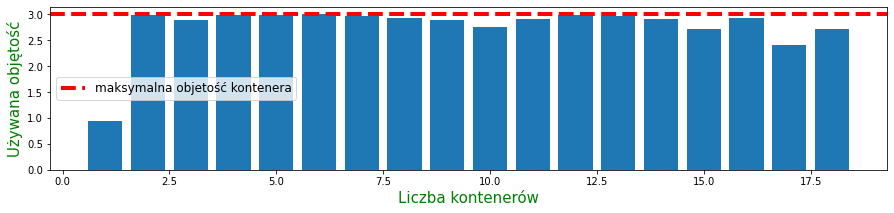

In [34]:
plot.figure(figsize=(15, 3))
x = np.arange(quant) # Liczba używanych kontenerów
plot.bar(x+1, height = final_volume2)

# rysowanie linii poziomej == maksymalna objetość każdego kontenera
plot.axhline(y = v_max, color = 'r', linewidth=4, linestyle = '--', label='maksymalna objetość kontenera')  

plot.xlabel('Liczba kontenerów', fontsize=15, color='green')
plot.ylabel('Używana objętość', fontsize=15, color='green')

#plt.grid()
plot.legend(fontsize=12)
plot.show()

# Wniosek

Korzystając z Algorytmu Genetycznego, staraliśmy znaleźć minimalną liczbę pojemników wymaganych do spakowania wszystkich przedmiotów. Istnieje jednak duże prawdopodobieństwo, że to rozwiązanie nie jest najbardziej optymalne (jak widać na wykresie, <i>nie wszystkie</i> słupki osiągają maksimum.). Ale w przypadku problemów ze złożonością kombinatoryczną NP, takie podejście jest całkiem uzasadnione.

# Źródła inspiracji:

* <b>Materiał</b> z Wykładu cz. II i IV (Algorytmy ewolucyjne)
* <b>Genetic Algorithms with Python</b> by Clinton Sheppard
* <b>Hands-On Genetic Algorithms with Python</b> by Eyal Wirsansky